<a href="https://colab.research.google.com/github/Yathang007/YOLO_object_detection/blob/main/YOLO_Object_Detection_Lab_Assignmnent_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning Lab

**Lab Title:** Yolo11 -Model-Application Name( ***People Detection*** )

**Student Name:** Yathang Tupe

**Student ID:** 202201070076

**Date of Submission:** 16 April 2025

**Group Members**: Priyanka Kadam , Aditi Kulkarni


**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [ ]:
!nvidia-smi

Tue Apr  8 16:28:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 905.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yawtIfyZ6TTkXqbrIUgF")
project = rf.workspace("leo-ueno").project("people-detection-o4rdr")
version = project.version(9)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People-Detection-9 in yolov11:: 100%|██████████| 34814/34814 [00:11<00:00, 2936.54it/s]


In [ ]:
import os
import zipfile
from roboflow import Roboflow

#  Initialize Roboflow and download dataset in YOLOv8 format
rf = Roboflow(api_key="yawtIfyZ6TTkXqbrIUgF")
project = rf.workspace("leo-ueno").project("people-detection-o4rdr")
version = project.version(9)
dataset = version.download("yolov8")  # Use correct format like "yolov8"

#  Get dataset folder path
dataset_folder = dataset.location  # e.g., '/content/people-detection-9'
zip_path = os.path.join(dataset_folder, "roboflow.zip")
extract_path = dataset_folder  # Extract in the same folder

# 1. Unzip the dataset
if os.path.exists(zip_path):
    print("📦 Extracting dataset...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print(" Dataset extracted successfully!")
else:
    print(" roboflow.zip not found at:", zip_path)

#  2. Verify dataset structure
yaml_path = os.path.join(extract_path, "data.yaml")

if os.path.exists(yaml_path):
    print(" data.yaml found at:", yaml_path)
else:
    print(" data.yaml is missing! Check extracted folder contents:")
    print(os.listdir(extract_path))


loading Roboflow workspace...
loading Roboflow project...
 roboflow.zip not found at: /content/People-Detection-9/roboflow.zip
 data.yaml found at: /content/People-Detection-9/data.yaml


In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 319MB/s]
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/People-Detection-9/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

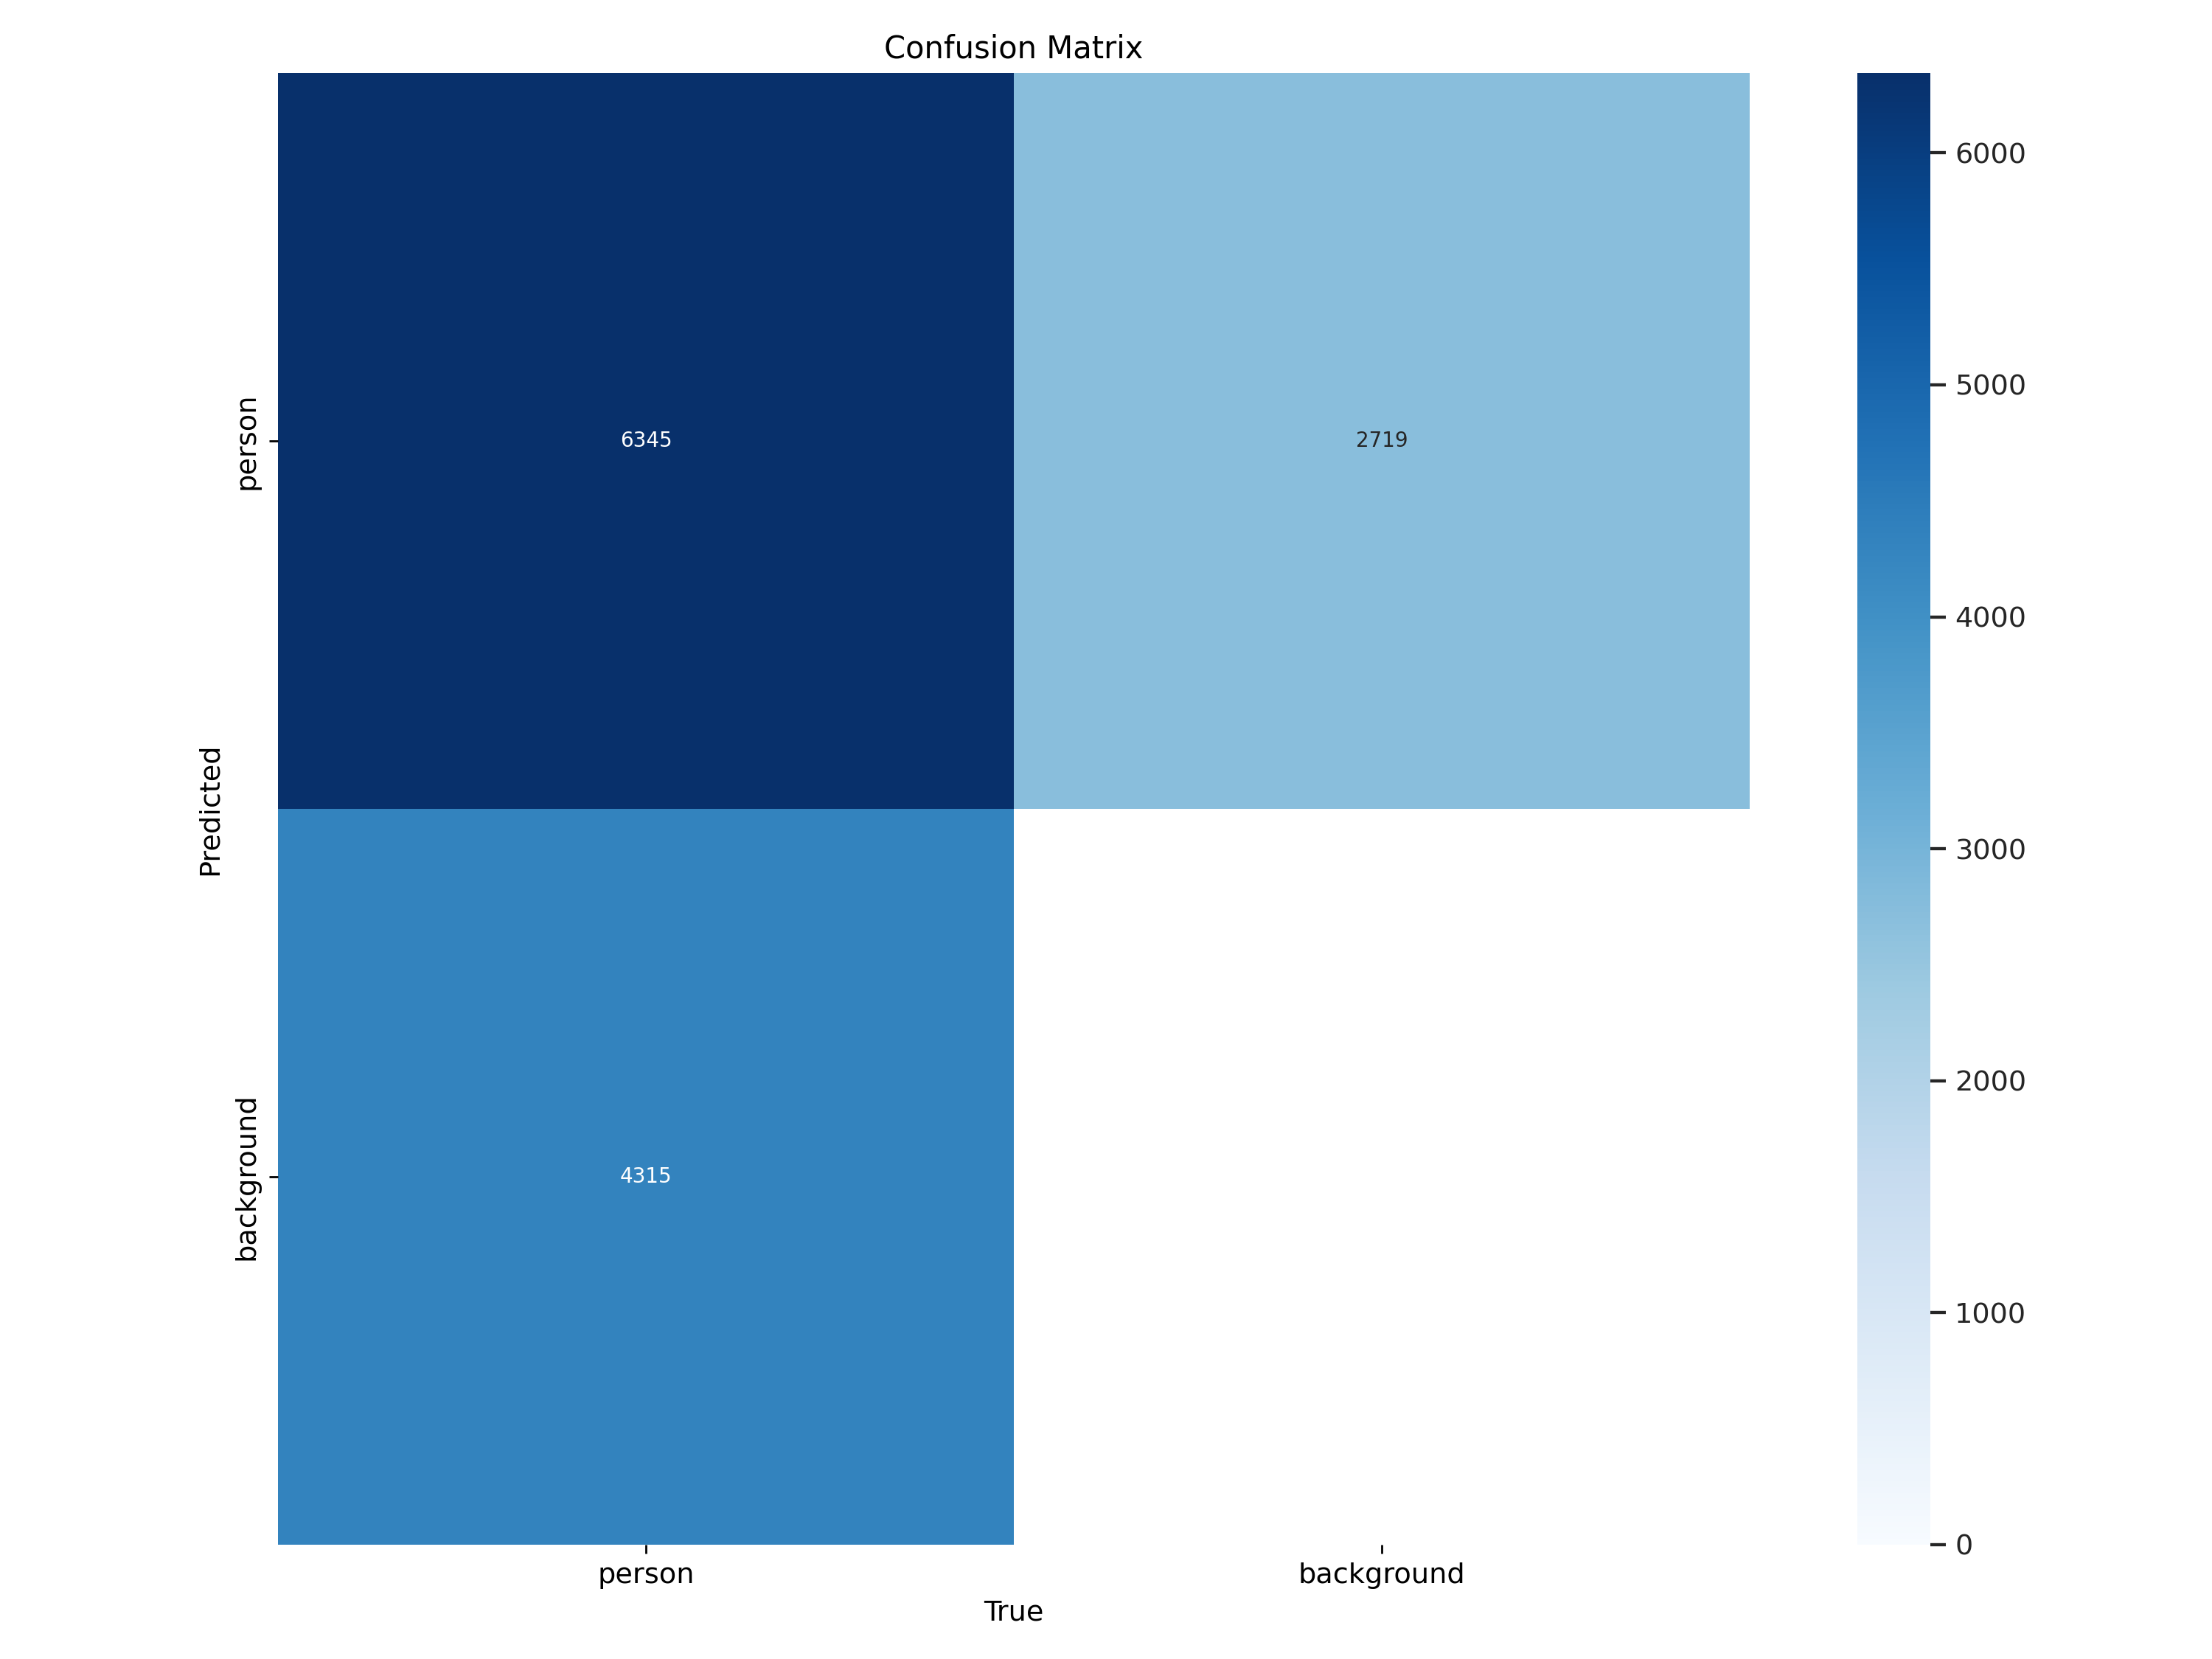

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

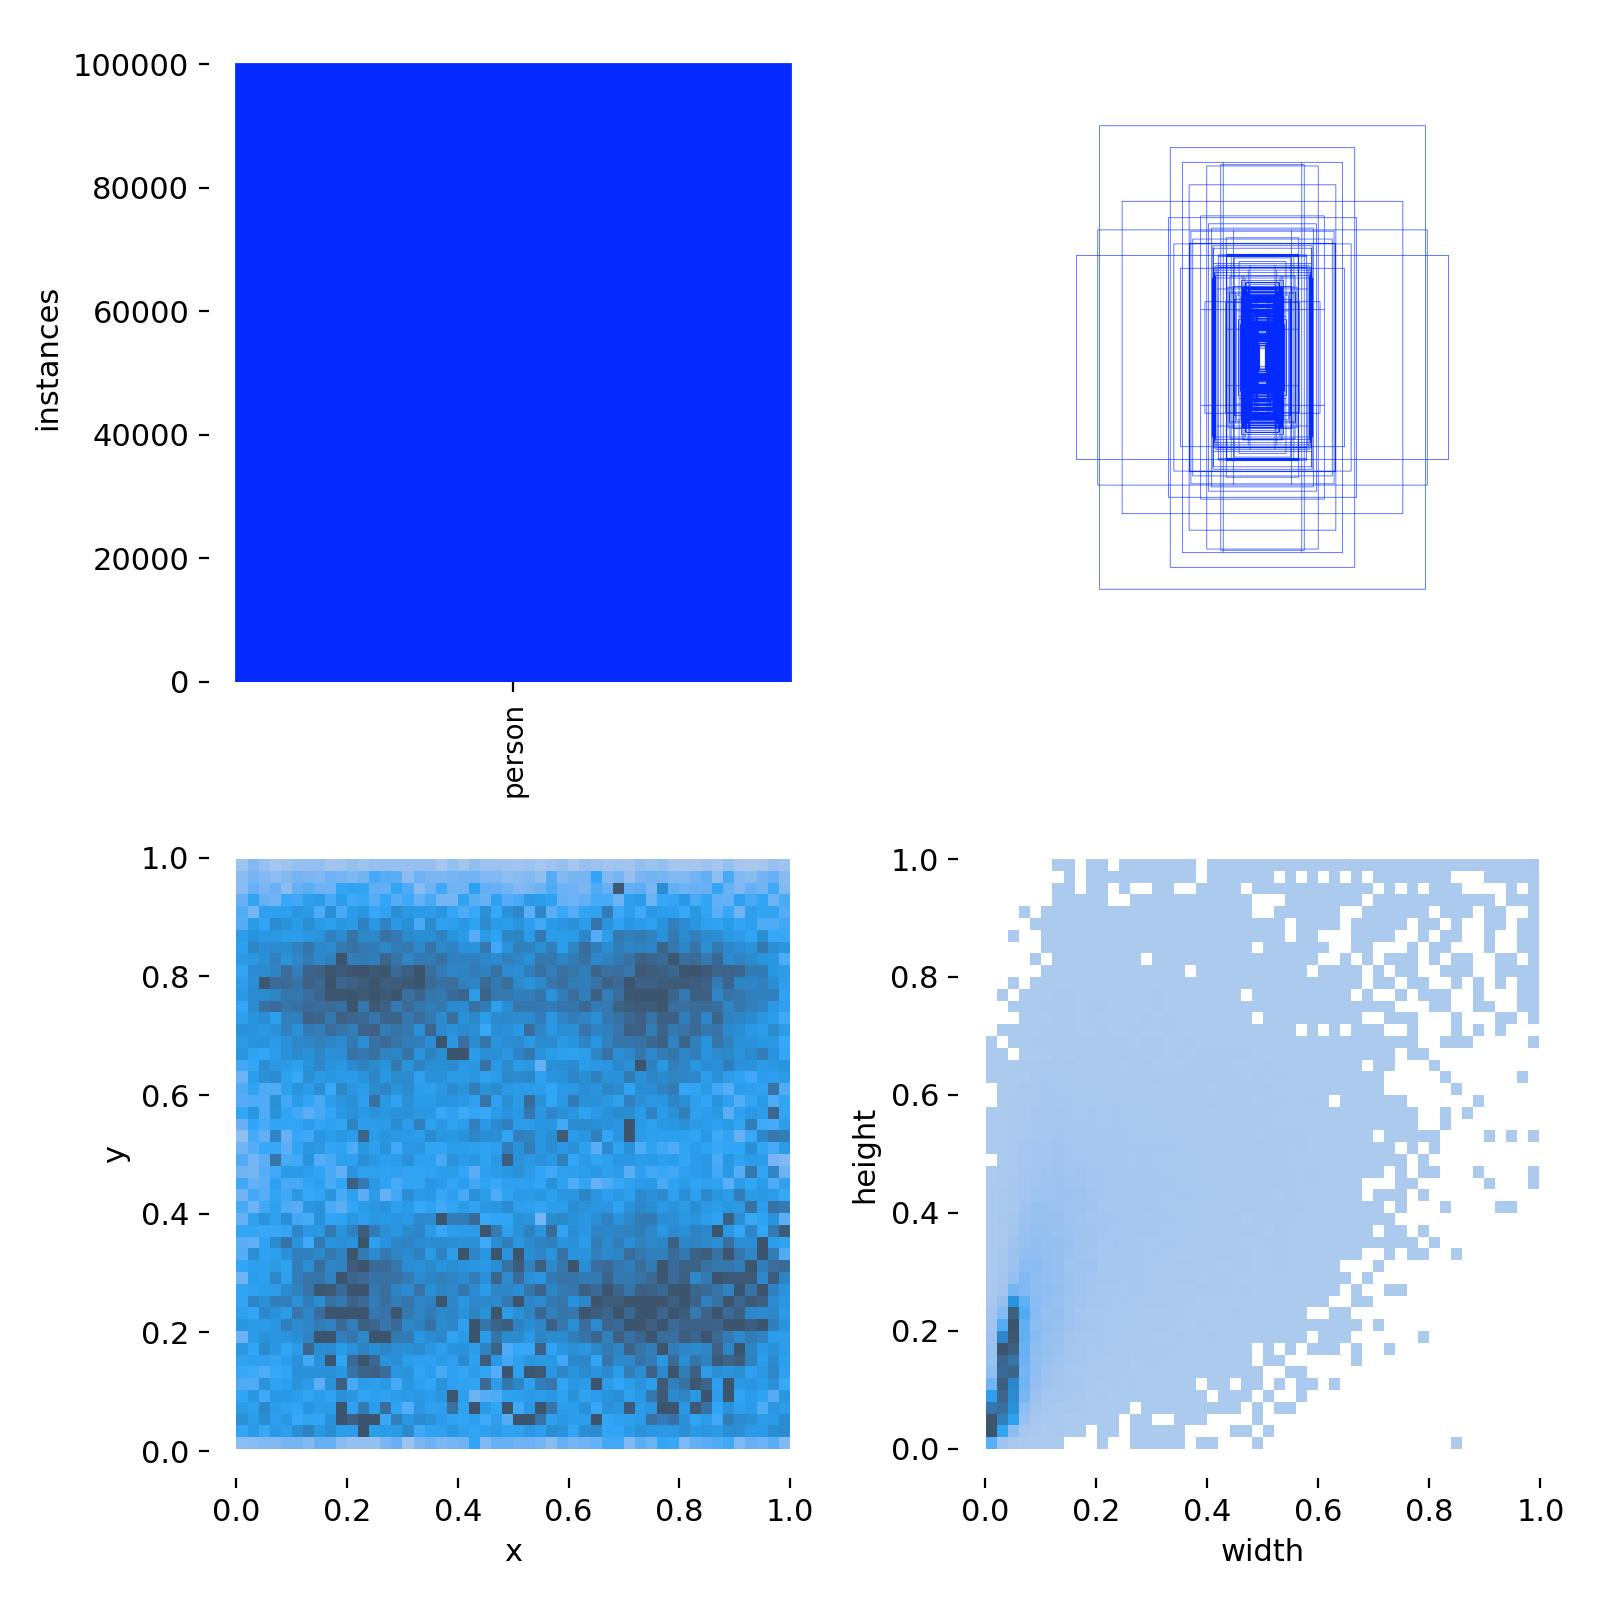

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

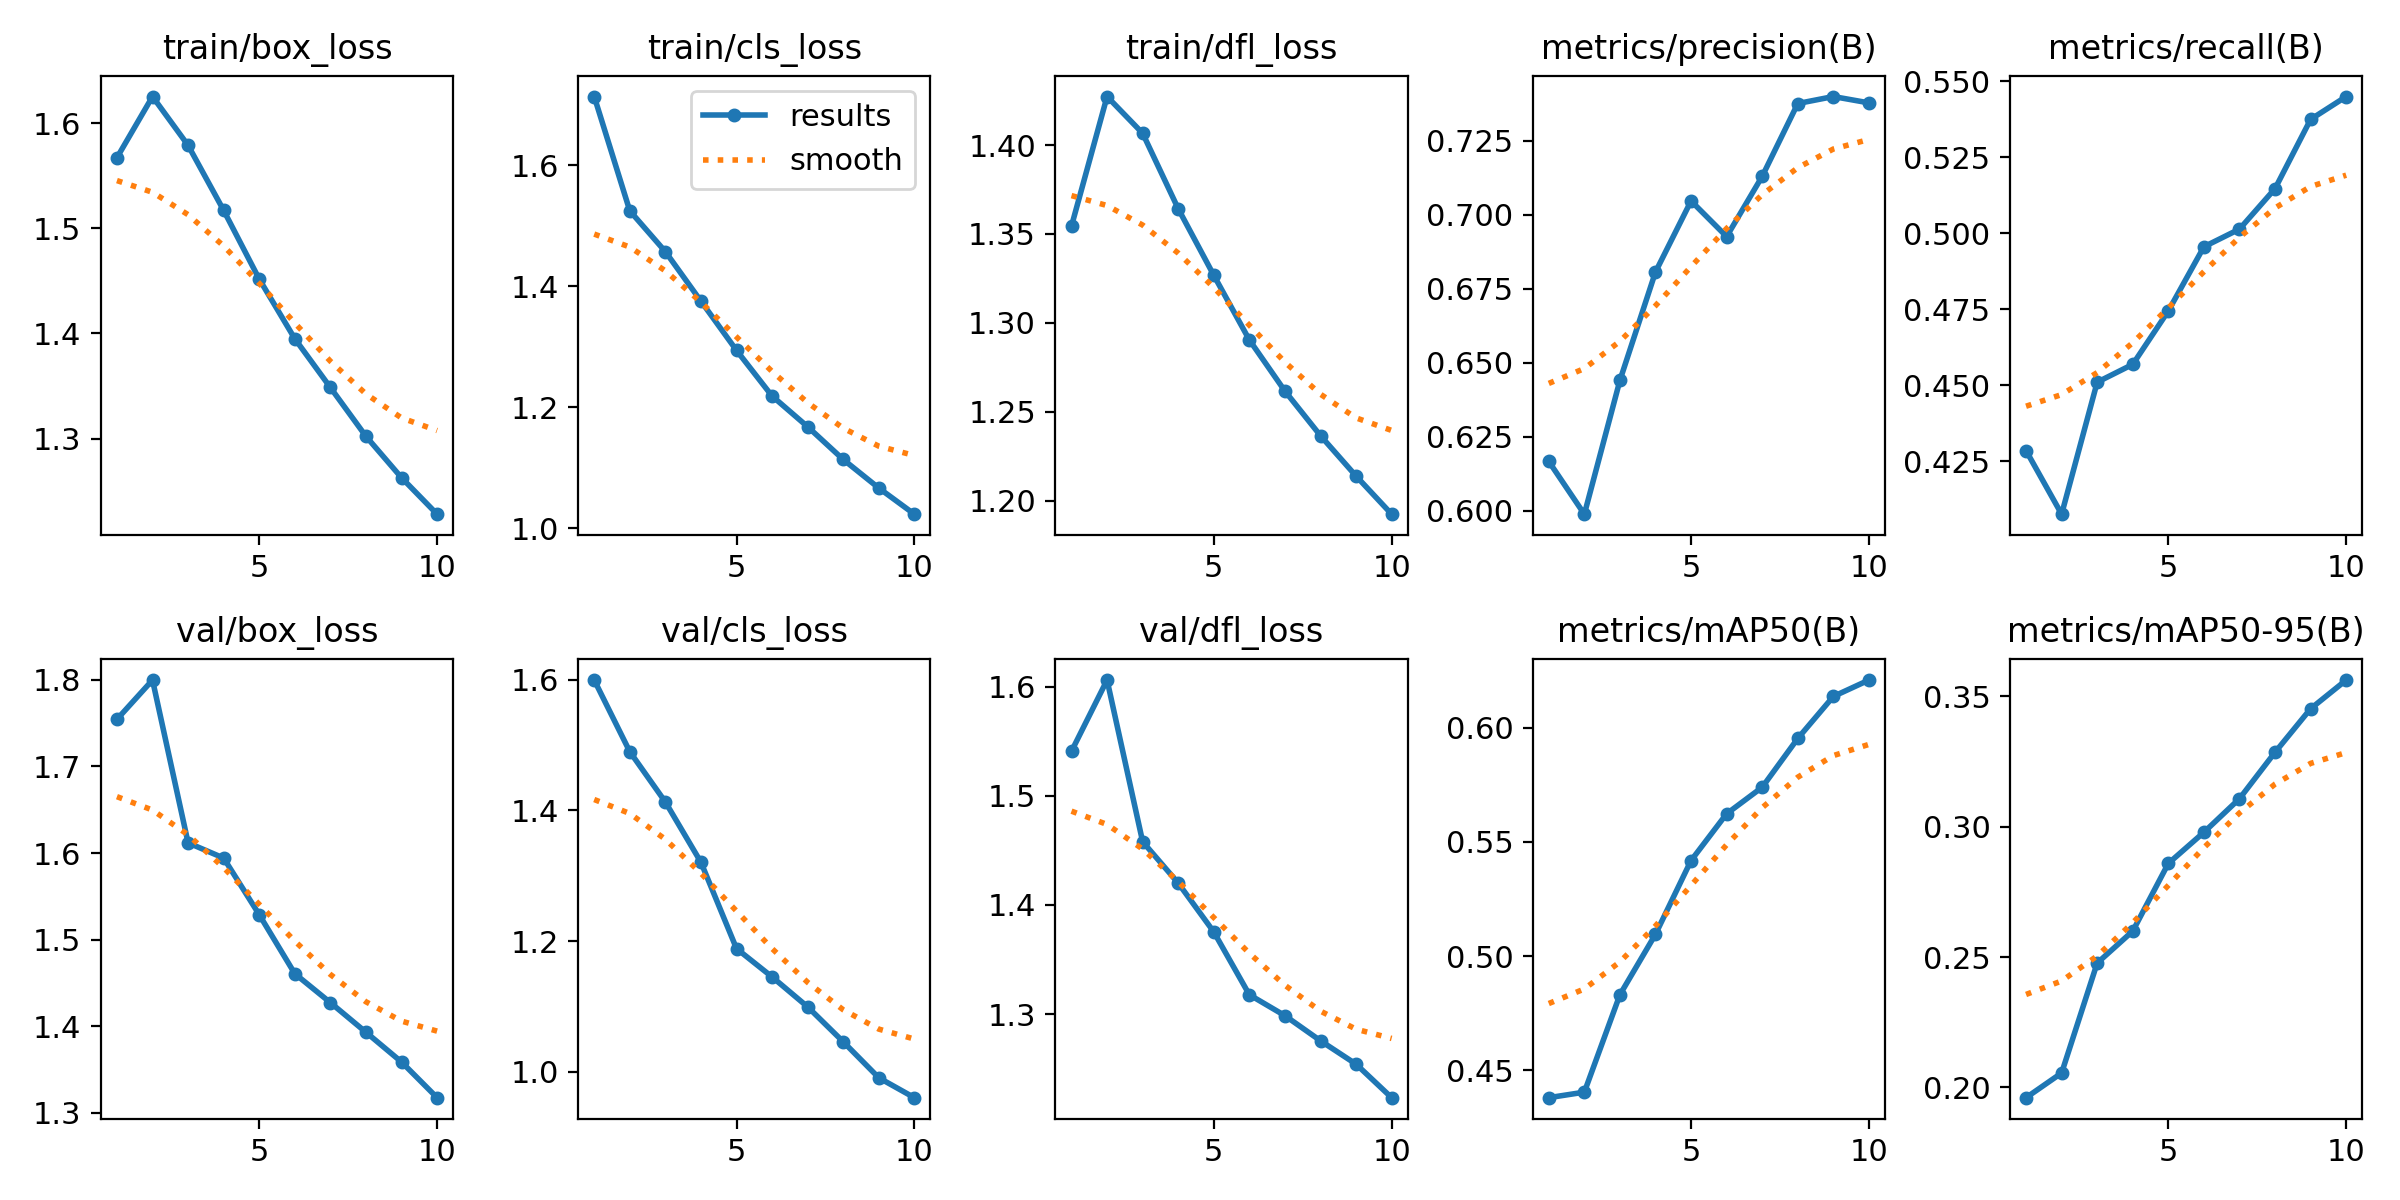

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

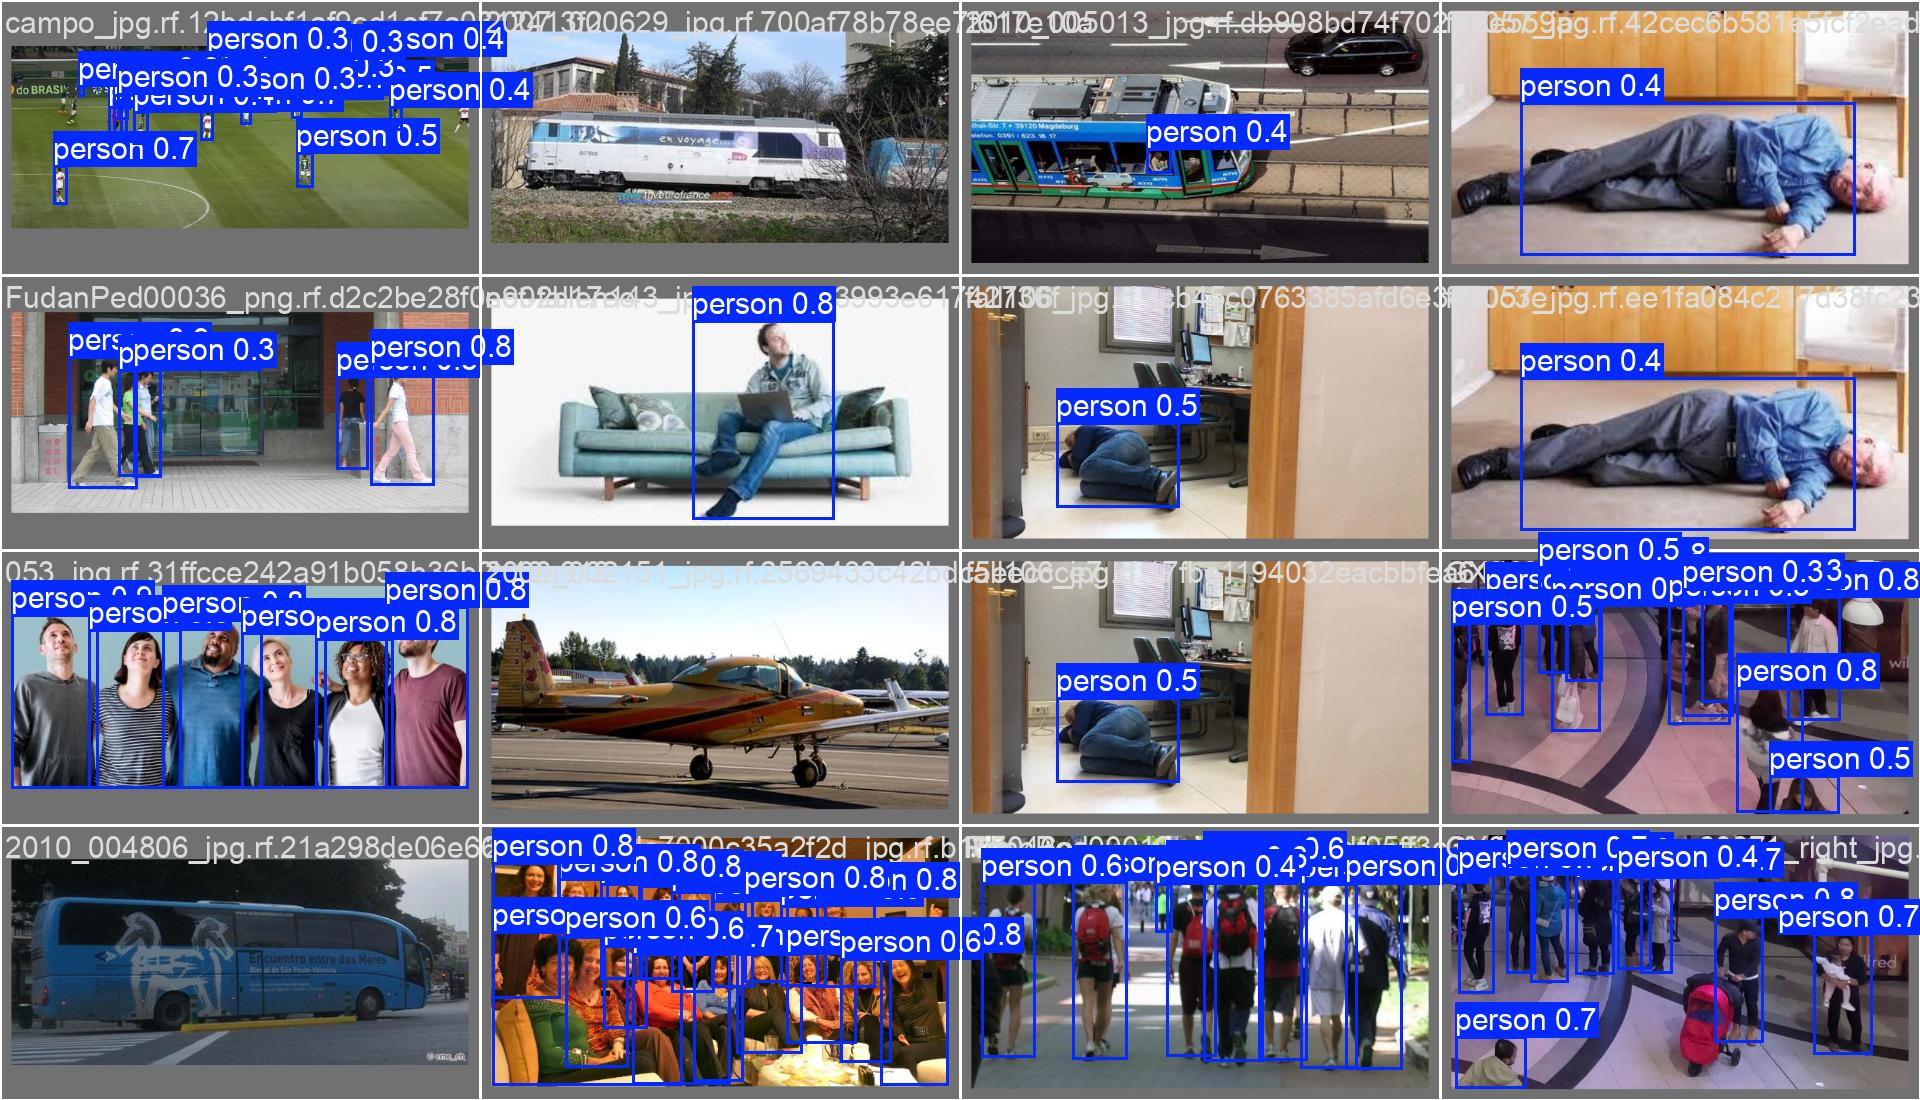

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

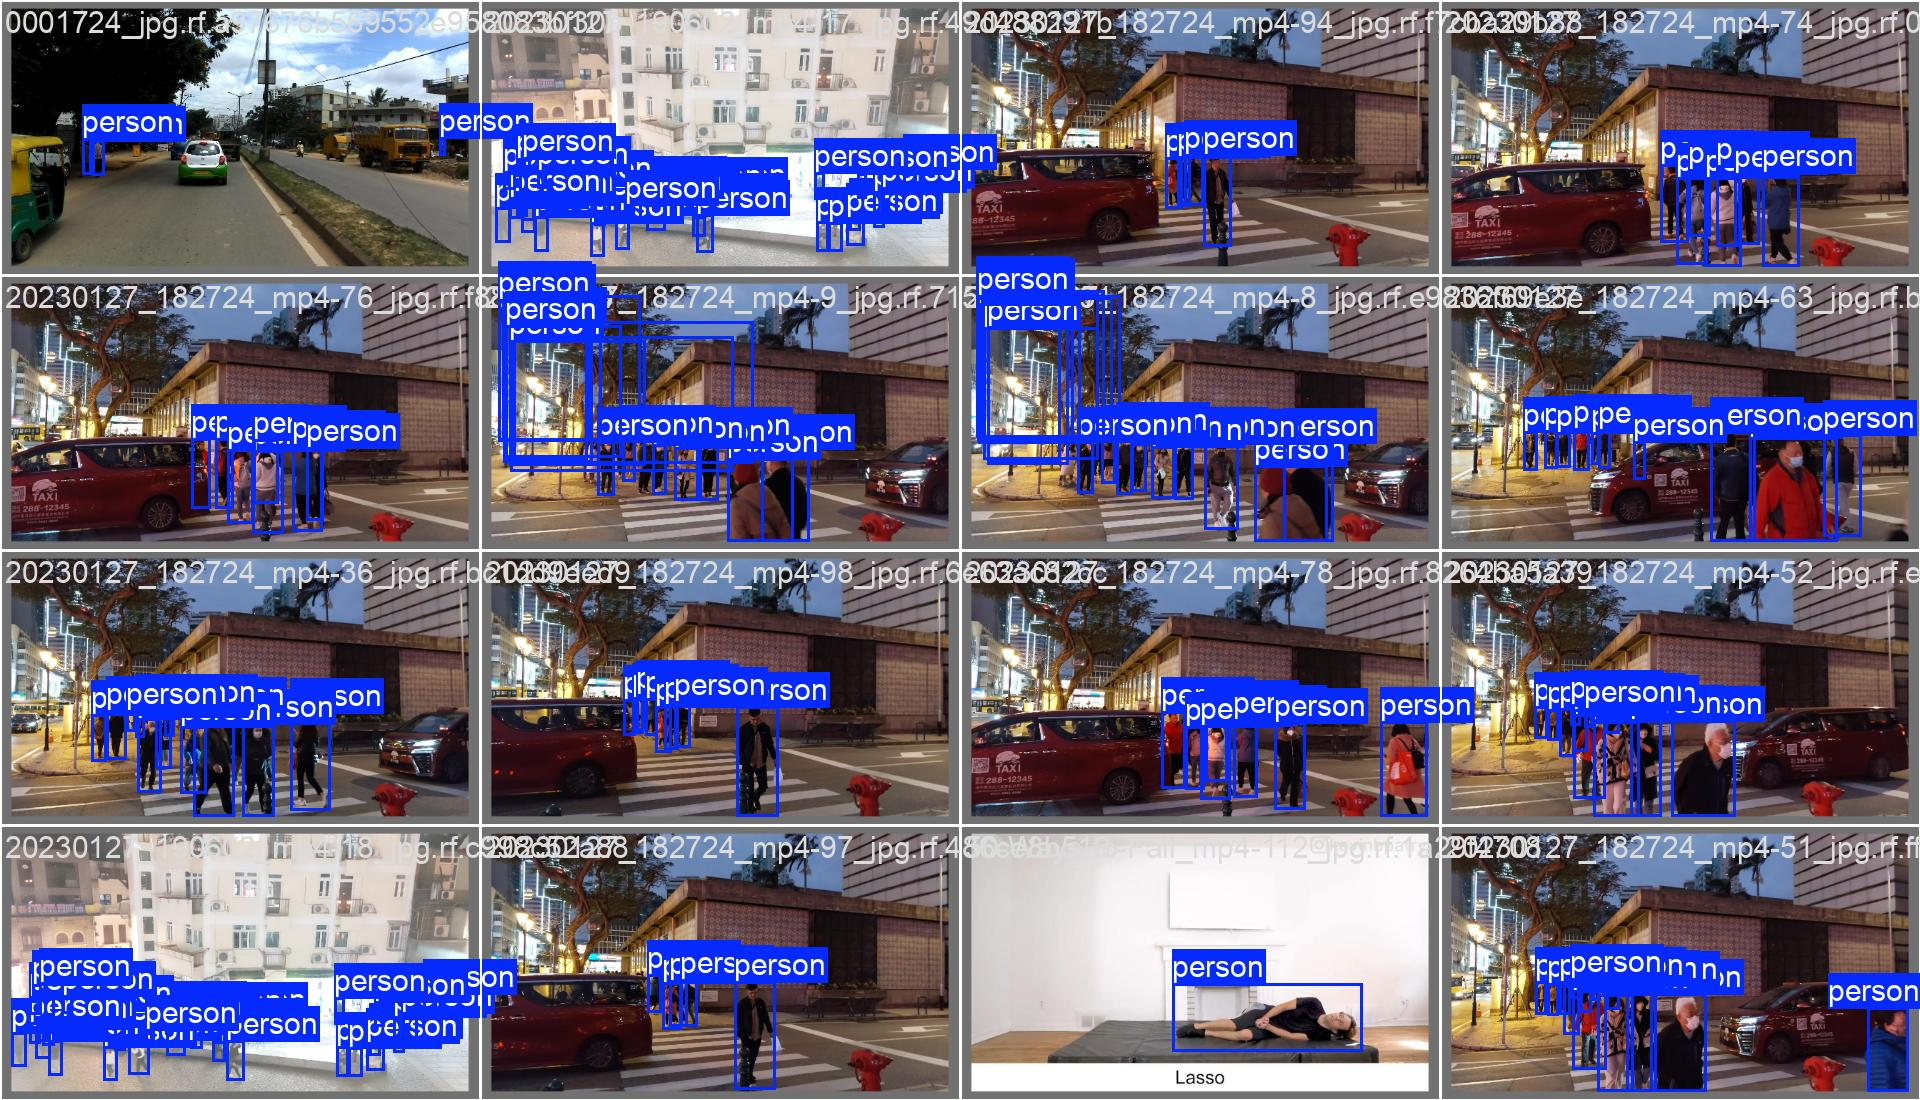

In [ ]:
Image("/content/runs/detect/train/val_batch1_labels.jpg", width=600)


**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/People-Detection-9/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100% 1431/1431 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/People-Detection-9/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 90/90 [00:20<00:00,  4.37it/s]
                   all       1431      10660      0.737      0.547      0.621      0.356
Speed: 0.6ms preprocess, 4.0ms inference, 0.0ms loss,

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 958, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 54, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1304, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

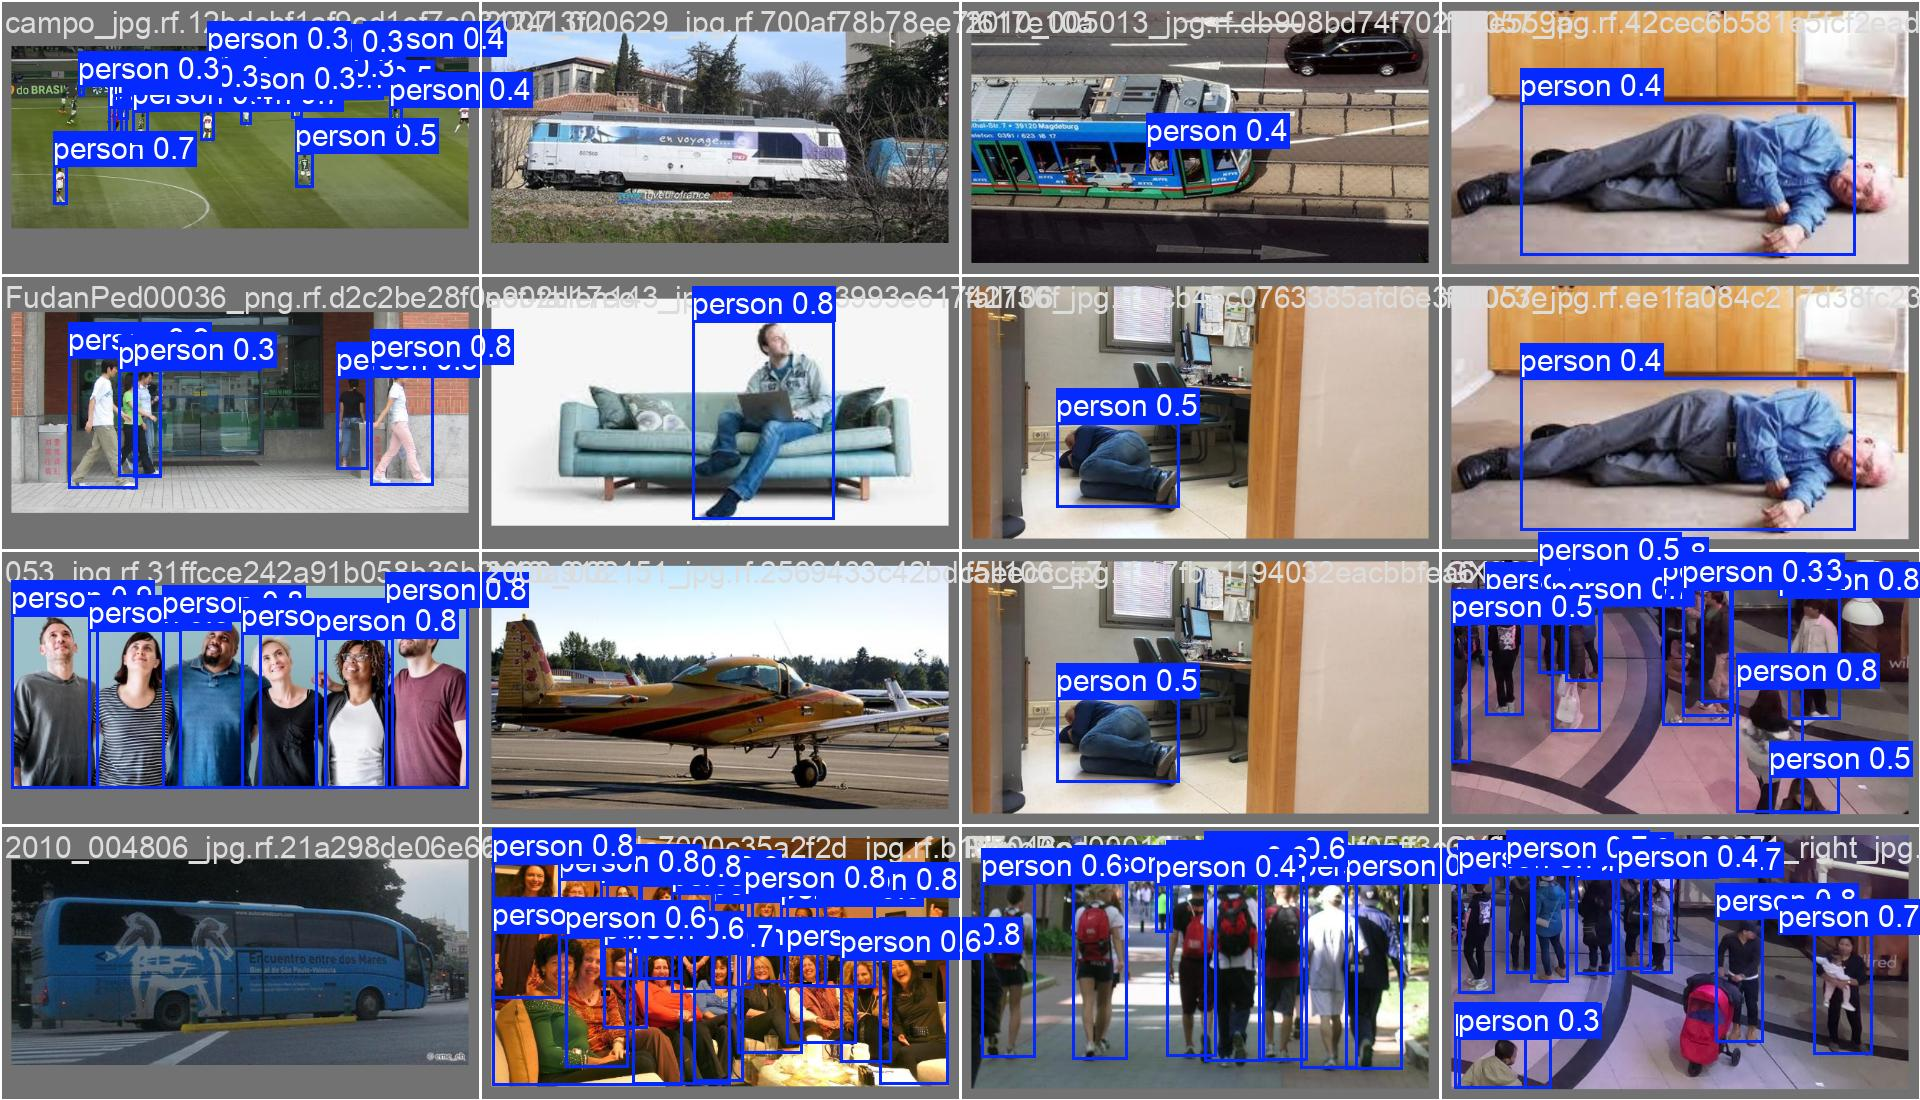

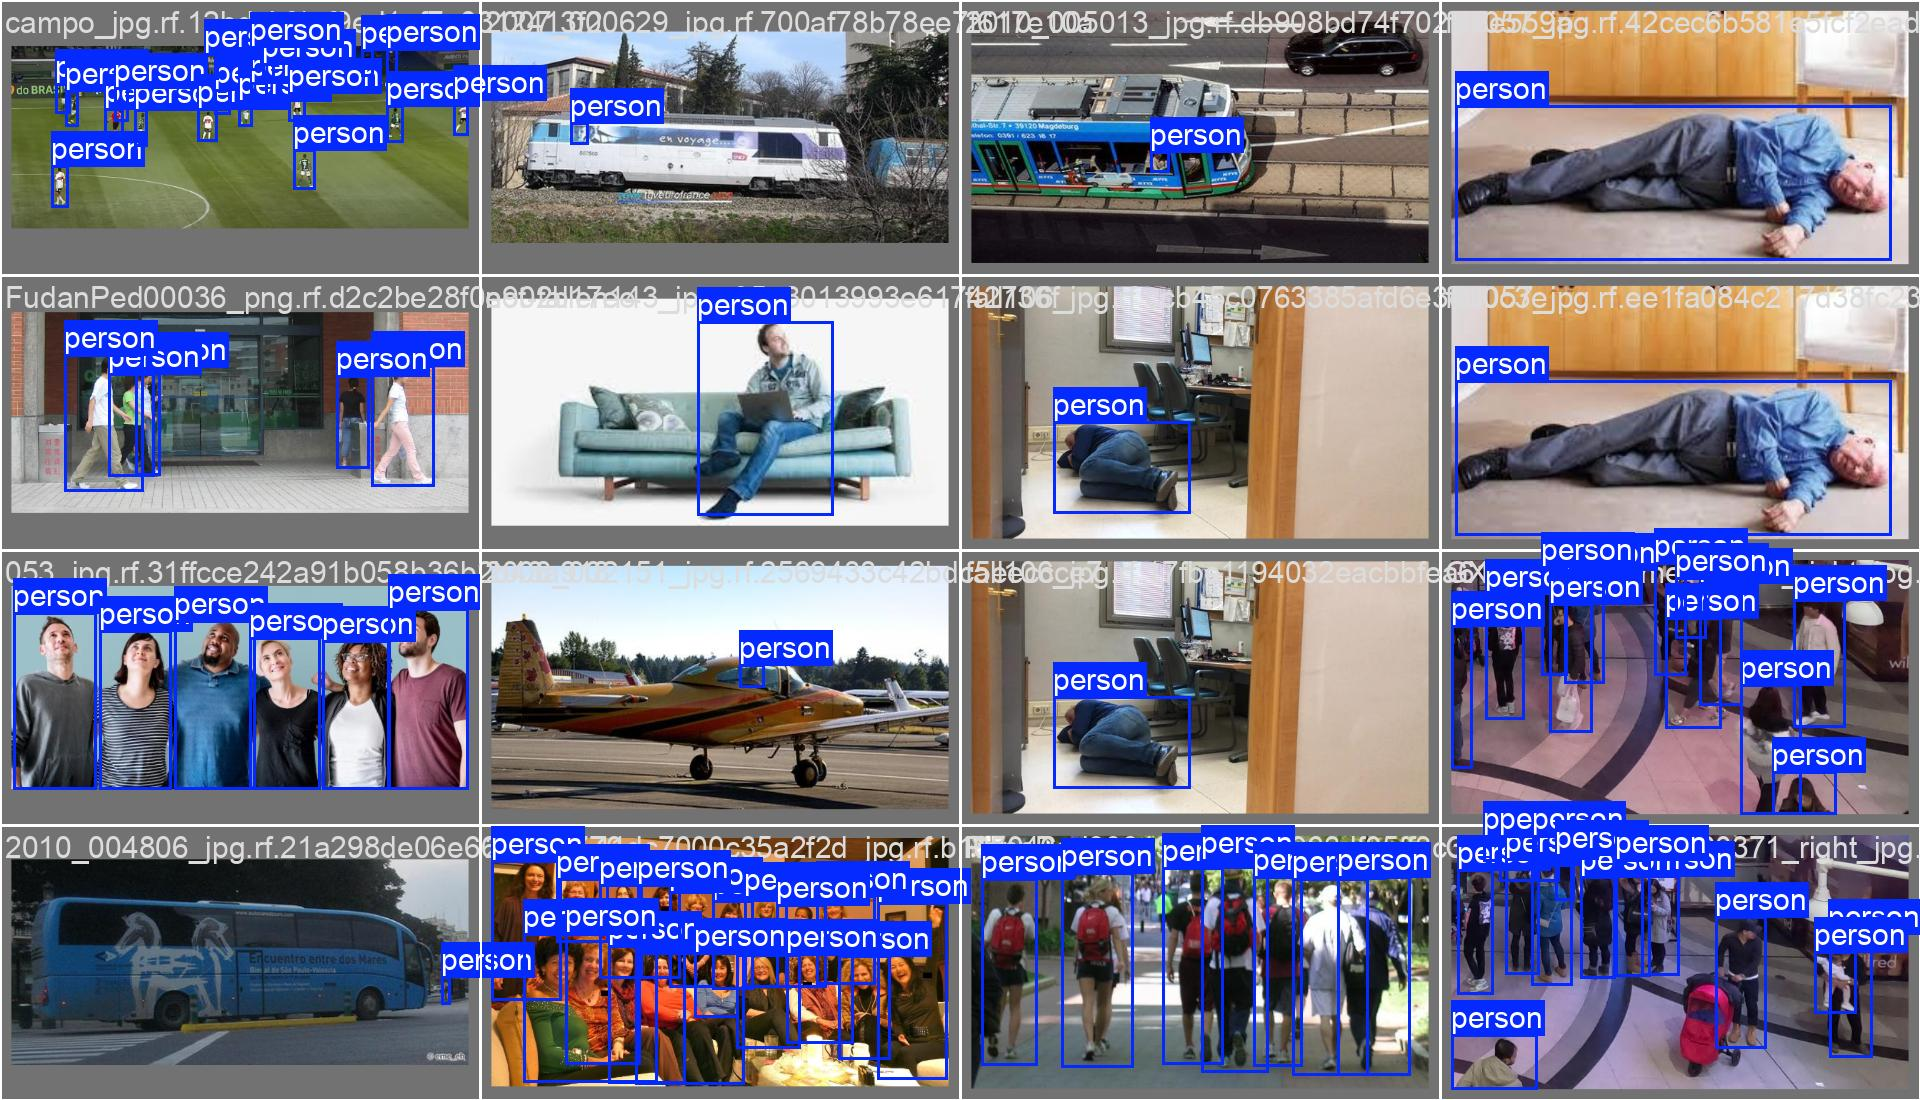

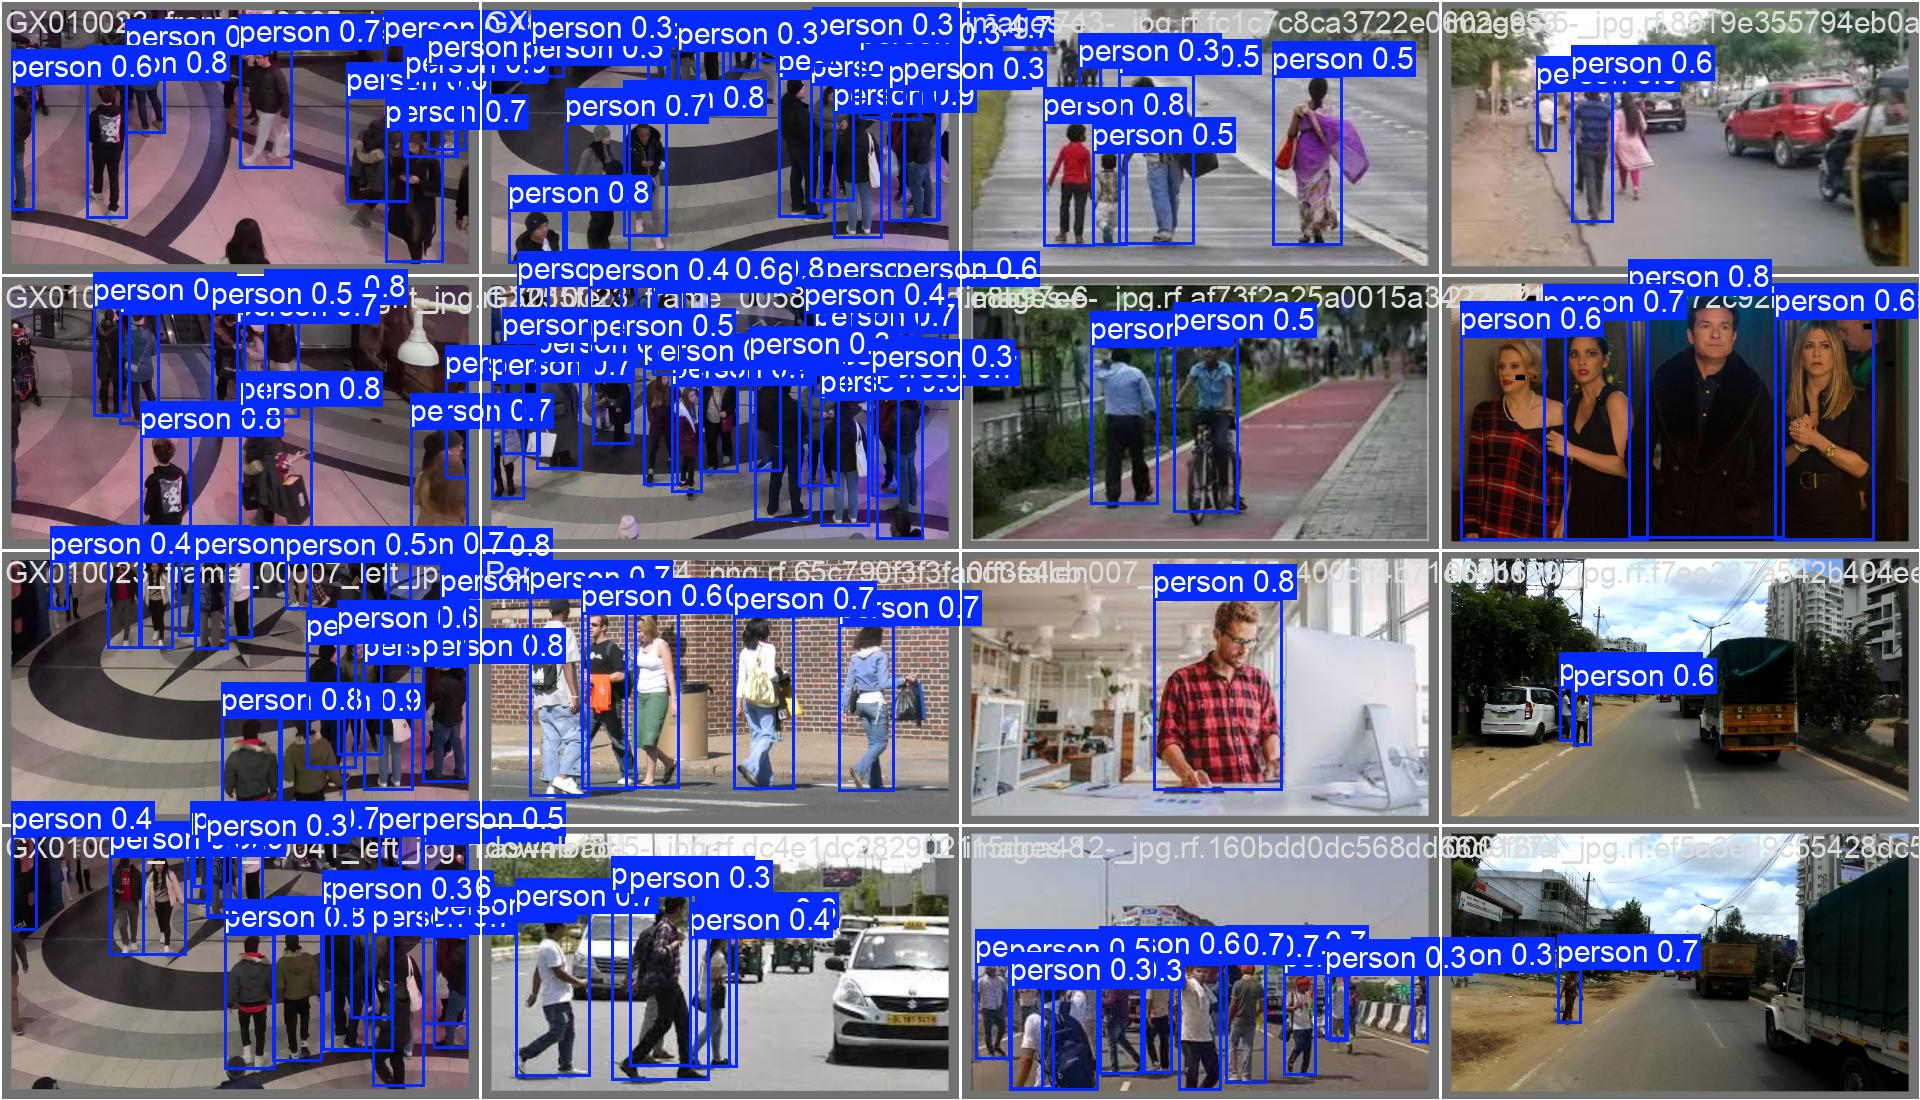

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/val*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 987, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 550, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 236, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/to

In [ ]:
import os
image_path = os.path.join(dataset.location, 'test', 'images', "image2.jpg") # Update to proper location
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source={image_path} save=True

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 987, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 550, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 236, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/to

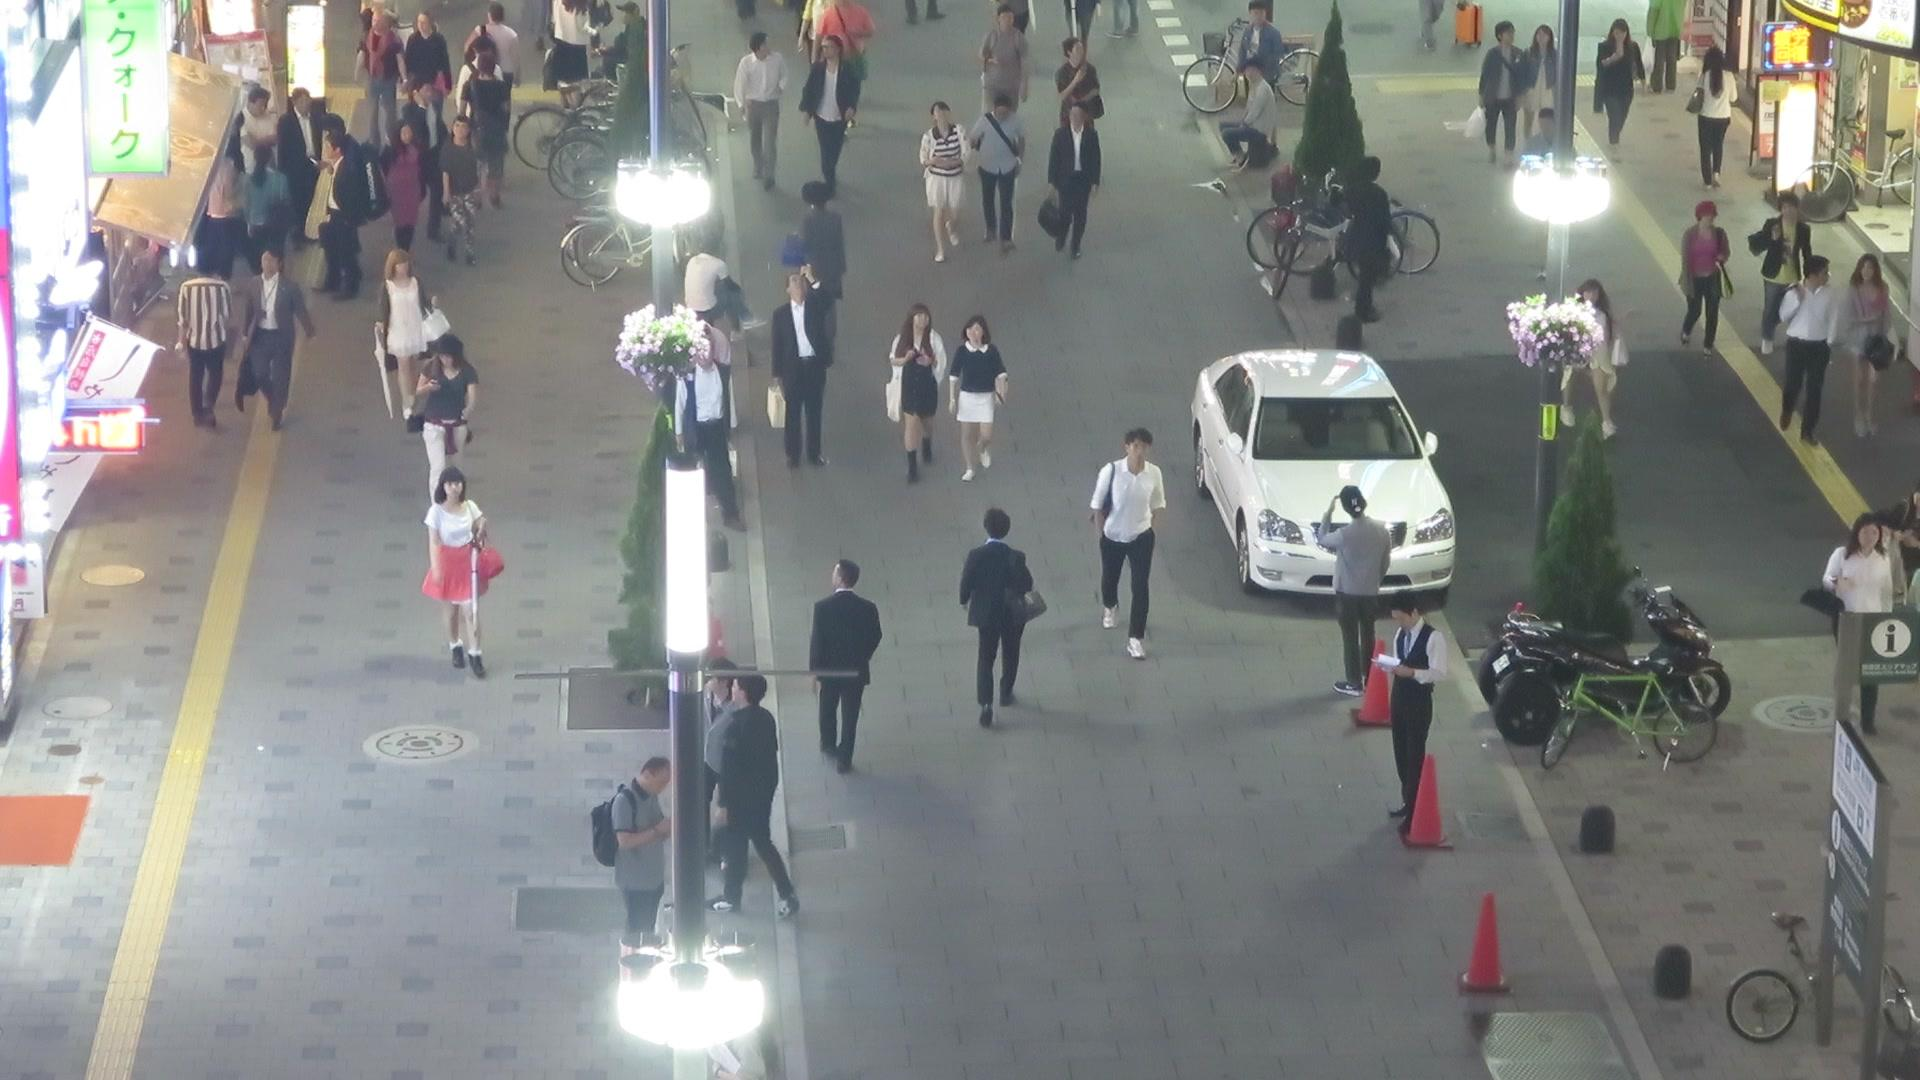

In [ ]:
Image("/content/People-Detection-9/test/images/000234_jpg.rf.e2273b11d6ec0e77dda12959a5d5e3a8.jpg", width=600)

In [ ]:
# Set training parameters
batch_size = 16       # Set your desired batch size
epochs = 20           # Set the number of epochs for training
learning_rate = 0.001 # Set the learning rate for the optimizer

# Train the YOLOv11 model using the prepared dataset
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov11n.pt" epochs={epochs} batch={batch_size} imgsz=640 lr0={learning_rate}

# Monitor training progress and evaluate the loss and accuracy
# You can monitor various metrics like loss, mAP, etc. from the training output
Image("/content/runs/detect/train/results.png", width=600)  # Model training results

#  Save the trained model weights
# The best weights will be automatically saved during training, but let's manually save it.
import shutil
shutil.copy('/content/runs/detect/train/weights/best.pt', '/content/yolov11_best_weights.pt')

print(" Training completed. Best model weights saved.")


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 958, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 54, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 148, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 290, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1304, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** The YOLOv11 model has demonstrated effective performance in detecting objects, as evidenced by the accuracy, precision, recall, and F1 score metrics.
Precision and recall metrics provide valuable insights into the model’s ability to detect objects accurately and avoid false detections. The balance between these two is critical for fine-tuning the model.


In [ ]:
import os

# Check what's inside the default download path
print("📂 Contents of /content:")
print(os.listdir("/content"))

📂 Contents of /content:
['.config', 'People-Detection-9', 'yolov11_best_weights.pt', 'runs', 'yolo11n.pt', 'yolov8n.pt']


In [ ]:
import os

dataset_path = "/content/People-Detection-9"
print("📁 Inside People-Detection-9:", os.listdir(dataset_path))

📁 Inside People-Detection-9: ['test', 'data.yaml', 'README.roboflow.txt', 'README.dataset.txt', 'valid', 'train']



image 1/760 /content/People-Detection-9/test/images/0000540_jpg.rf.d1b964542ac8df27835f1348ebcac01a.jpg: 512x640 2 persons, 54.2ms
image 2/760 /content/People-Detection-9/test/images/000054_r-2_jpg.rf.23723f3554a328733717247da135acc8.jpg: 512x640 4 persons, 7.4ms
image 3/760 /content/People-Detection-9/test/images/000070_jpg.rf.5898e9817249586892b429970c485b29.jpg: 384x640 29 persons, 1 car, 1 motorcycle, 1 potted plant, 56.4ms
image 4/760 /content/People-Detection-9/test/images/000071_jpg.rf.b134f02af03ac3e9ada819f9010aebce.jpg: 384x640 27 persons, 1 car, 1 motorcycle, 9.4ms
image 5/760 /content/People-Detection-9/test/images/000075_jpg.rf.81b226a4f4ca1e5463ba31e203c9a029.jpg: 384x640 27 persons, 1 car, 1 potted plant, 9.2ms
image 6/760 /content/People-Detection-9/test/images/000077_jpg.rf.86614d2155ccf19053745e610adca4ab.jpg: 384x640 27 persons, 1 car, 11.5ms
image 7/760 /content/People-Detection-9/test/images/000079_jpg.rf.1ec8b32716b68fc22ed1078a66ef611a.jpg: 384x640 30 persons, 1

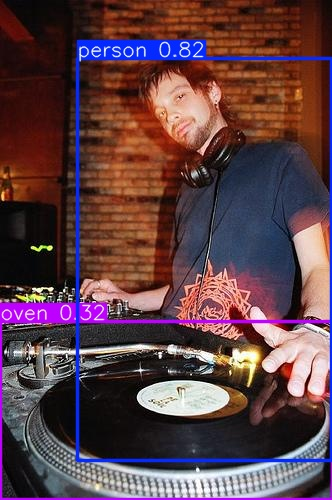

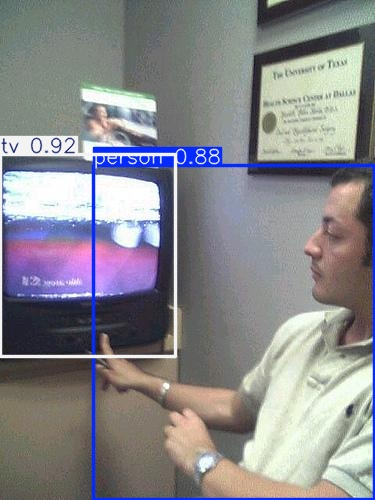

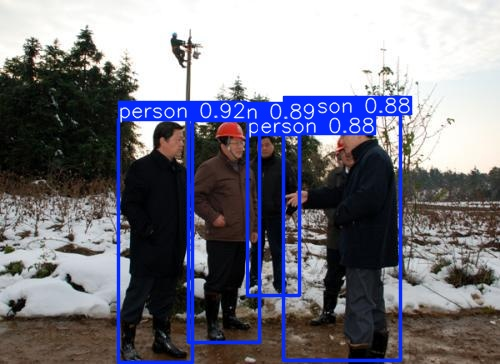

In [ ]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display
import os

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # You can switch to custom weights if available

# Use test images from your Roboflow dataset
image_folder = "/content/People-Detection-9/test/images"

# Run inference and save the results
results = model.predict(source=image_folder, save=True)

# Display results from the latest prediction folder
prediction_folders = sorted(glob.glob("runs/detect/predict*"), key=os.path.getmtime, reverse=True)

if prediction_folders:
    latest_folder = prediction_folders[0]
    print("📁 Showing results from:", latest_folder)

    predicted_images = glob.glob(os.path.join(latest_folder, "*.jpg"))
    for img_path in predicted_images[:3]:  # Display first 3 predictions
        display(Image(filename=img_path, width=600))
else:
    print("❌ No prediction results found.")


**Declaration**

I, [ Yathang Tupe ], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:

Signature: Yathang Tupe

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion